# Linear regresion on the housing dataset

A good blog (5 min read) to get you started: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

##Uploading the dataset


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Real estate valuation data set.xlsx to Real estate valuation data set.xlsx


## Pre-processing the data

In [ ]:
df = pd.read_excel ('Real estate valuation data set.xlsx')
# print(df.columns.values)
# Droping the first column
df = df.drop(['No'], axis=1)
print(df.columns.values)

['X1 transaction date' 'X2 house age'
 'X3 distance to the nearest MRT station'
 'X4 number of convenience stores' 'X5 latitude' 'X6 longitude'
 'Y house price of unit area']


## Some preliminary analysis of the data

In [ ]:
# checking for null values in the dataset
df.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


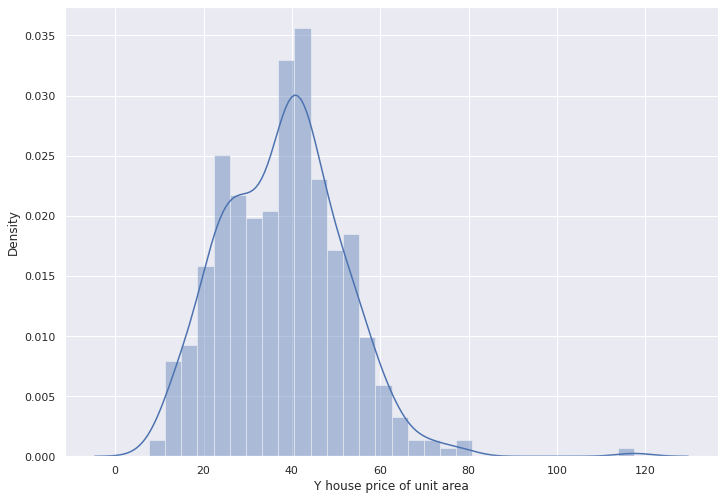

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['Y house price of unit area'], bins=30)
plt.show()

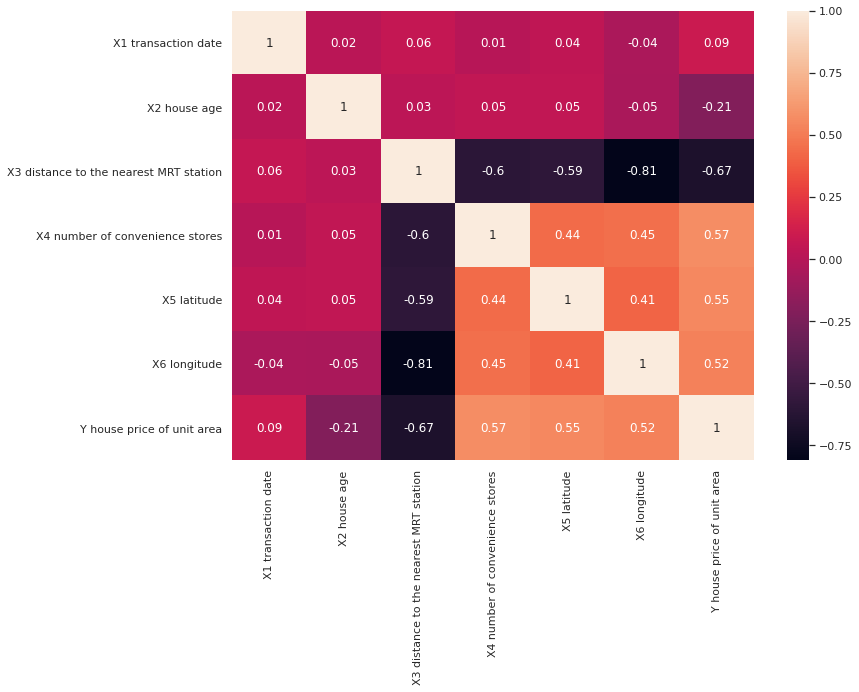

In [ ]:
correlation_matrix = df.corr().round(2)
# annot = True # to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

## Preparing the data for training the model

In [ ]:
X = df.drop('Y house price of unit area', axis=1)
Y = df['Y house price of unit area']
# X[0:4].to_numpy()
# Y[:4]
print(len(X))

414


In [ ]:
def split(X, Y, test_ratio = 0.2):
  # returns a numpy array after the split
  n = len(X)
  train_ratio = 1-test_ratio
  train_size = int(train_ratio*n)
  X_train = X[:train_size].to_numpy()
  Y_train = Y[:train_size].to_numpy()

  X_test = X[train_size:].to_numpy()
  Y_test = Y[train_size:].to_numpy()

  return X_train, X_test, Y_train, Y_test

In [ ]:
X_train, X_test, Y_train, Y_test = split(X,Y,0.2)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
# print(X_train)
# print(Y_train)

(331, 6)
(83, 6)
(331,)
(83,)


## Training the model

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

ridge_model = Ridge(alpha = 0.001)
ridge_model.fit(X_train, Y_train)

lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X_train, Y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

## Testing the model

In [ ]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 9.039559194442166
R2 score is 0.5762031025744503


The model performance for testing set
--------------------------------------
RMSE is 7.707397881473077
R2 score is 0.6095720835524494


In [ ]:
y_train_predict = ridge_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = ridge_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 9.039862995712182
R2 score is 0.5761746161855874


The model performance for testing set
--------------------------------------
RMSE is 7.696737334398328
R2 score is 0.610651383408024


In [ ]:
y_train_predict = lasso_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lasso_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 9.040374157786848
R2 score is 0.5761266841344763


The model performance for testing set
--------------------------------------
RMSE is 7.695178914438426
R2 score is 0.6108090365019123
